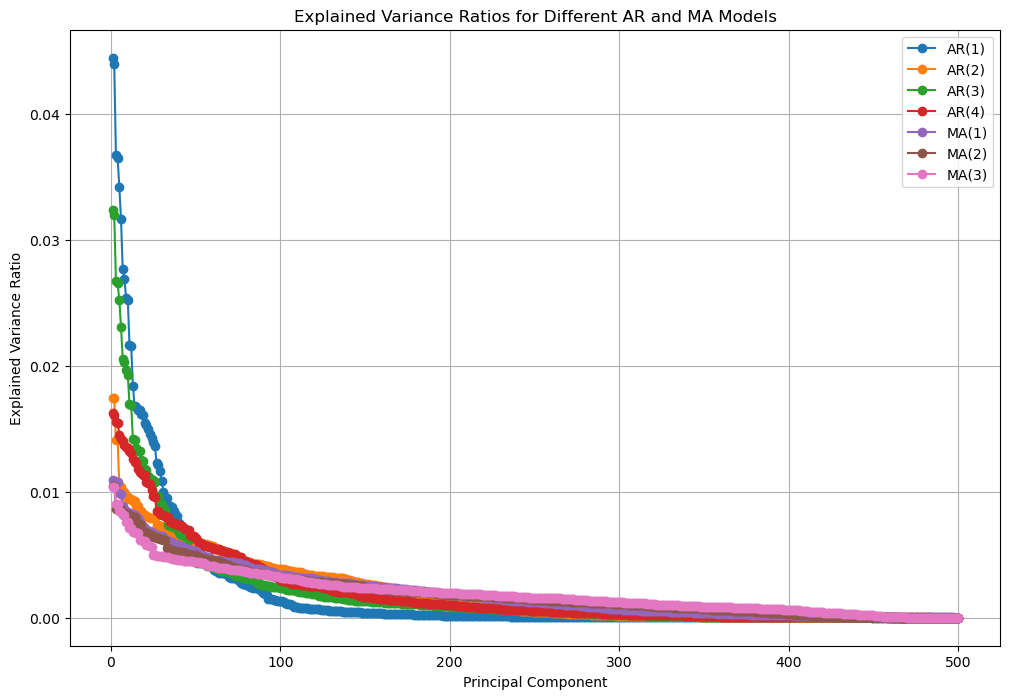

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf
from scipy.linalg import toeplitz
from sklearn.decomposition import PCA

# Simulate AR(p)
def simulate_ar(phi, n, seed=42):
    np.random.seed(seed)
    p = len(phi)
    epsilon = np.random.normal(size=n)
    X = np.zeros(n)
    for t in range(p, n):
        X[t] = sum(phi[i] * X[t-i-1] for i in range(p)) + epsilon[t]
    return X

# Simulate MA(q)
def simulate_ma(theta, n, seed=42):
    np.random.seed(seed)
    q = len(theta)
    epsilon = np.random.normal(size=n)
    X = np.zeros(n)
    for t in range(q, n):
        X[t] = sum(theta[i] * epsilon[t-i-1] for i in range(q)) + epsilon[t]
    return X

# Autocovariance Matrix
def autocovariance_matrix(data, lag):
    autocovariances = acovf(data, fft=False, nlag=lag-1)
    return toeplitz(autocovariances)

# PCA Explained Variance Ratios
def pca_explained_variance(matrix, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(matrix)
    return pca.explained_variance_ratio_

# Parameters
n = 5000
lag = 500

# Simulate AR(1), AR(2), AR(3), AR(4), MA(1), MA(2), MA(3)
ar1_series = simulate_ar([0.7], n)
ar2_series = simulate_ar([0.7, -0.3], n)
ar3_series = simulate_ar([0.7, -0.3, 0.2], n)
ar4_series = simulate_ar([0.7, -0.3, 0.2, -0.1], n)

ma1_series = simulate_ma([0.5], n)
ma2_series = simulate_ma([0.5, -0.4], n)
ma3_series = simulate_ma([0.5, -0.4, 0.3], n)

# Autocovariance Matrices
ar1_autocov_matrix = autocovariance_matrix(ar1_series, lag)
ar2_autocov_matrix = autocovariance_matrix(ar2_series, lag)
ar3_autocov_matrix = autocovariance_matrix(ar3_series, lag)
ar4_autocov_matrix = autocovariance_matrix(ar4_series, lag)

ma1_autocov_matrix = autocovariance_matrix(ma1_series, lag)
ma2_autocov_matrix = autocovariance_matrix(ma2_series, lag)
ma3_autocov_matrix = autocovariance_matrix(ma3_series, lag)

# PCA Explained Variance Ratios
explained_variances = {
    "AR(1)": pca_explained_variance(ar1_autocov_matrix, lag),
    "AR(2)": pca_explained_variance(ar2_autocov_matrix, lag),
    "AR(3)": pca_explained_variance(ar3_autocov_matrix, lag),
    "AR(4)": pca_explained_variance(ar4_autocov_matrix, lag),
    "MA(1)": pca_explained_variance(ma1_autocov_matrix, lag),
    "MA(2)": pca_explained_variance(ma2_autocov_matrix, lag),
    "MA(3)": pca_explained_variance(ma3_autocov_matrix, lag),
}

# Plot Explained Variance Ratios
plt.figure(figsize=(12, 8))

for model, variance in explained_variances.items():
    plt.plot(np.arange(1, lag + 1), variance, marker='o', label=model)

plt.title('Explained Variance Ratios for Different AR and MA Models')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()


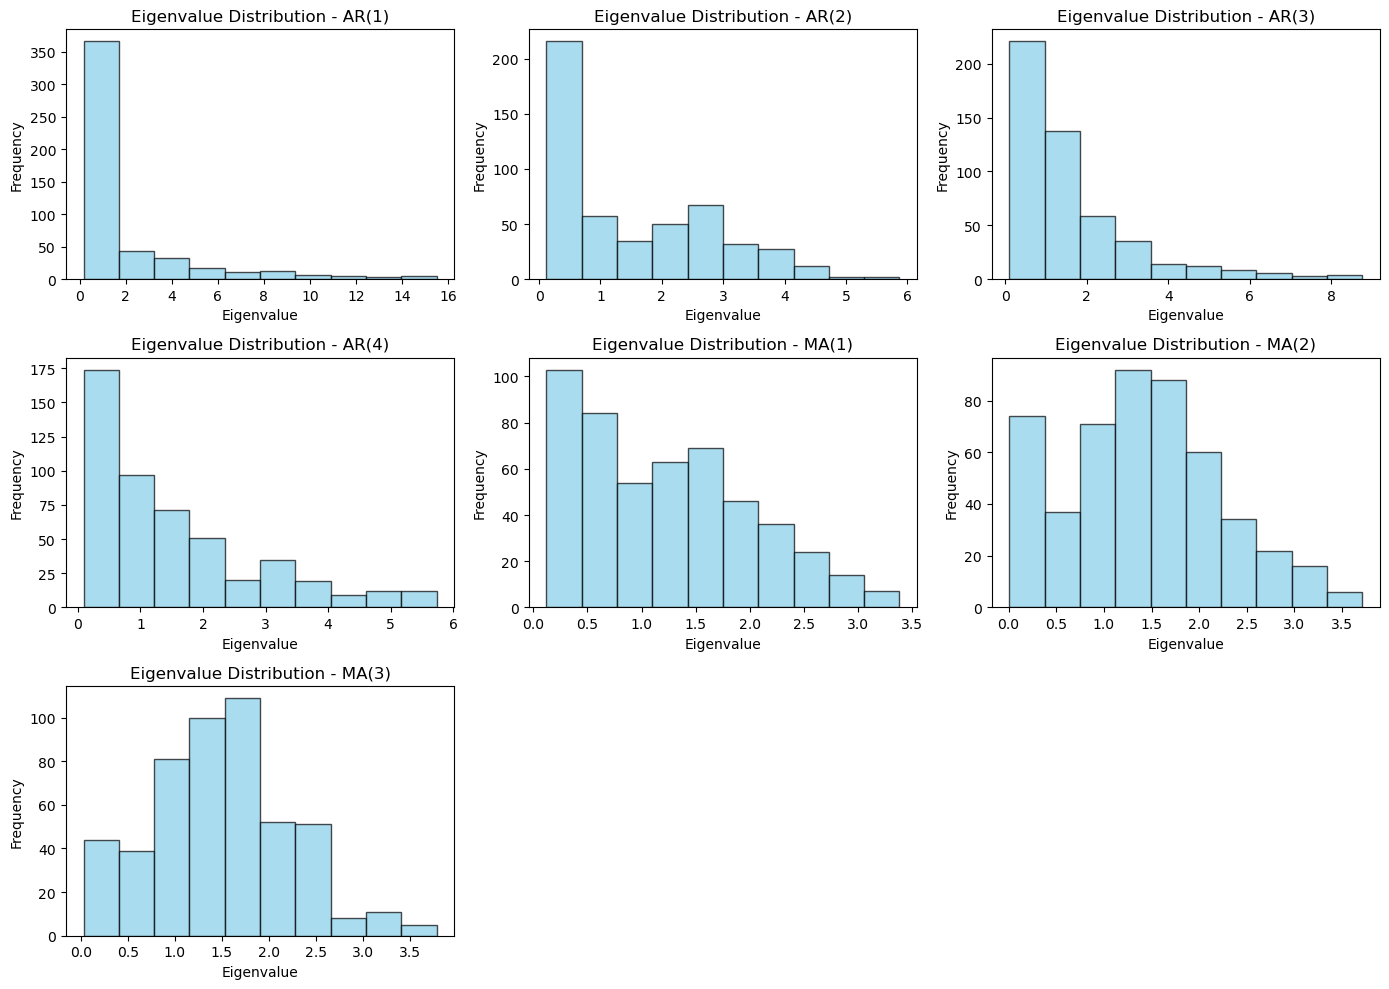

In [49]:
from scipy.linalg import toeplitz, eigvals

models = {
    "AR(1)": simulate_ar([0.7], n),
    "AR(2)": simulate_ar([0.7, -0.3], n),
    "AR(3)": simulate_ar([0.7, -0.3, 0.2], n),
    "AR(4)": simulate_ar([0.7, -0.3, 0.2, -0.1], n),
    "MA(1)": simulate_ma([0.5], n),
    "MA(2)": simulate_ma([0.5, -0.4], n),
    "MA(3)": simulate_ma([0.5, -0.4, 0.3], n)
}

# Plot histograms of eigenvalue distributions
plt.figure(figsize=(14, 10))

for i, (model_name, series) in enumerate(models.items(), 1):
    autocov_matrix = autocovariance_matrix(series, lag)
    eigenvalues = eigvals(autocov_matrix)
    plt.subplot(3, 3, i)
    plt.hist(eigenvalues.real, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Eigenvalue Distribution - {model_name}')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()